In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train_data = pd.read_csv("./titanic/train.csv")
test_data = pd.read_csv("./titanic/test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
len(train_data), train_data.PassengerId.nunique()

(891, 891)

In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

29.69911764705882


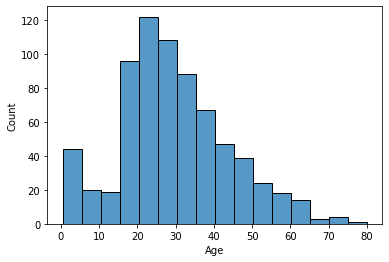

In [8]:
print(train_data['Age'].mean())
sns.histplot(train_data['Age'], bins=16);

In [9]:
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

In [10]:
train_data['CabinLetter'] = train_data['Cabin'].apply(lambda x : str(x)[0] if not pd.isna(x) else np.nan)
train_data['CabinLetter'].value_counts(dropna=False)

NaN    687
C       59
B       47
D       33
E       32
A       15
F       13
G        4
T        1
Name: CabinLetter, dtype: int64

In [11]:
for pclass in train_data['Pclass'].unique():
    print(pclass)
    print(train_data[ train_data['Pclass'] == pclass ]['CabinLetter'].value_counts(dropna=False))

3
NaN    479
F        5
G        4
E        3
Name: CabinLetter, dtype: int64
1
C      59
B      47
NaN    40
D      29
E      25
A      15
T       1
Name: CabinLetter, dtype: int64
2
NaN    168
F        8
E        4
D        4
Name: CabinLetter, dtype: int64


In [12]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'CabinLetter'],
      dtype='object')

In [13]:
X_train = train_data.drop(columns=['PassengerId','Survived','Name','Ticket','Cabin'])
y_train = train_data['Survived']

In [14]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinLetter
0,3,male,22.0,1,0,7.2500,S,NaN
1,1,female,38.0,1,0,71.2833,C,C
2,3,female,26.0,0,0,7.9250,S,NaN
3,1,female,35.0,1,0,53.1000,S,C
4,3,male,35.0,0,0,8.0500,S,NaN


In [15]:
X_train = pd.get_dummies(X_train, columns=['Sex','Embarked','CabinLetter'], dummy_na=True)
X_train.drop(columns=['Sex_male','Sex_nan','Embarked_nan'], inplace=True)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Embarked_C,Embarked_Q,Embarked_S,CabinLetter_A,CabinLetter_B,CabinLetter_C,CabinLetter_D,CabinLetter_E,CabinLetter_F,CabinLetter_G,CabinLetter_T,CabinLetter_nan
0,3,22.0,1,0,7.2500,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,0,0,0,1,0,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,0,0,0,0,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,1,0,0,0,0,0,0
4,3,35.0,0,0,8.0500,0,0,0,1,0,0,0,0,0,0,0,0,1


In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
model = RandomForestClassifier(n_estimators=100, max_depth=4, n_jobs=-1, random_state=42, verbose=0)

In [18]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=42)

In [22]:
test_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(train_data['Fare'].mean(), inplace=True)
test_data['CabinLetter'] = test_data['Cabin'].apply(lambda x : str(x)[0] if not pd.isna(x) else np.nan)
X_test = test_data.drop(columns=['PassengerId','Name','Ticket','Cabin'])
X_test = pd.get_dummies(X_test, columns=['Sex','Embarked','CabinLetter'], dummy_na=True)
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0
X_test.drop(columns=list(set(X_test.columns) - set(X_train.columns)), inplace=True)

In [23]:
y_pred = model.predict(X_test)

In [25]:
y_pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [28]:
predictions = pd.DataFrame({'PassengerId':test_data['PassengerId'], 'Survived':y_pred})
predictions.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [29]:
predictions.to_csv('submission.csv', index=False)